RECURRENT NEURAL NETWORK
---


HIDDEN LAYER ARE LOOPED ACCORDING TO THE NUMBER OF HIDDEN LAYERS REQUIRED




New state=F[(previous hidden layer o/p),new input]
---


Applications
---
 1. IMAGE CAPTIONING
 2. TIME SERIES PREDICTION 
 3. NATURAL LANGUAGE PROCESSING
 4. MACHINE TRANSLATION
 ---
 

ISSUES OF STANDARD RNNs
---
1. VANISHING GRADIENT PROBLEM
2.  EXPLODING GRADIENT PROBLEM 


SIMPLE RNN
---


In [6]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb

from tensorflow.keras.preprocessing import sequence
from keras.layers import Dense


In [7]:
max_features =10000  
maxlen=500
batch_size= 32
print('Loading data.....')
(x_train,y_train),(x_test, y_test)= imdb.load_data(num_words=max_features)
print(len(x_train),'train sequences')
print(len(x_test),'test sequences')
print('Pad Squences(samples x time)')
x_train=sequence.pad_sequences(x_train, maxlen=maxlen)
x_test= sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:',x_train.shape) 
print('x_test shape :',x_test.shape)  



Loading data.....
25000 train sequences
25000 test sequences
Pad Squences(samples x time)
x_train shape: (25000, 500)
x_test shape : (25000, 500)


In [8]:
# x_train
# x_test
# y_test
# y_train




In [9]:
model= Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

In [14]:
history= model.fit(x_train,y_train,
                   epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 71s 445ms/step - loss: 0.6661 - acc: 0.5857 - val_loss: 0.5341 - val_acc: 0.7448
Epoch 2/10
157/157 [==============================] - 82s 524ms/step - loss: 0.4289 - acc: 0.8170 - val_loss: 0.3815 - val_acc: 0.8358
Epoch 3/10
157/157 [==============================] - 71s 446ms/step - loss: 0.3013 - acc: 0.8766 - val_loss: 0.4031 - val_acc: 0.8392
Epoch 4/10
157/157 [==============================] - 75s 476ms/step - loss: 0.2132 - acc: 0.9204 - val_loss: 0.5185 - val_acc: 0.7620
Epoch 5/10
157/157 [==============================] - 71s 450ms/step - loss: 0.1529 - acc: 0.9437 - val_loss: 0.4314 - val_acc: 0.8362
Epoch 6/10
157/157 [==============================] - 70s 444ms/step - loss: 0.0970 - acc: 0.9675 - val_loss: 0.5908 - val_acc: 0.7720
Epoch 7/10
157/157 [==============================] - 71s 452ms/step - loss: 0.0592 - acc: 0.9829 - val_loss: 0.5111 - val_acc: 0.8356
Epoch 8/10
157/157 [==============================] - 7

In [16]:
acc=history.history['acc']
val_acc= history.history['val_acc']
loss=history.history['loss']
val_loss= history.history['val_loss']


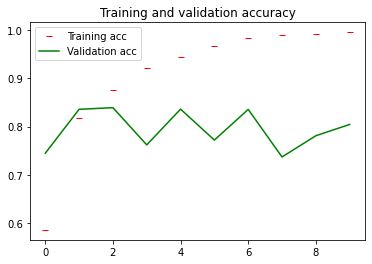

In [21]:
import matplotlib.pyplot as plt
epochs= range(len(acc))
plt.plot(epochs,acc,'r_',label='Training acc')
plt.plot(epochs,val_acc,'g',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()